<a href="https://colab.research.google.com/github/veritaem/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Copy_of_Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
!pip install seaborn==0.9.0

In [0]:
pd.set_option('display.height', 1000)

pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

pd.set_option('display.width', 1000)

In [3]:
data = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv"

df = pd.read_csv(data)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
Y = df['SalePrice'].values
df['ln_Y']= np.log(df['SalePrice'])
ln_Y = df['ln_Y']

In [0]:
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [0]:
df['Alley'].fillna('string', inplace = True)
df['MasVnrType'].fillna('string', inplace = True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace = True)
df['BsmtQual'].fillna('string', inplace = True)
df['BsmtCond'].fillna('string', inplace = True)
df['BsmtExposure'].fillna('string', inplace = True)
df['BsmtFinType1'].fillna('string', inplace = True)
df['BsmtFinType2'].fillna('string', inplace = True)
df['Electrical'].fillna('string', inplace = True)
df['GarageType'].fillna('string', inplace = True)
df['GarageYrBlt'].fillna(0, inplace = True)
df['GarageFinish'].fillna('string', inplace = True)
df['GarageQual'].fillna('string', inplace = True)
df['GarageCond'].fillna('string', inplace = True)
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)

In [7]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [0]:
df = df.drop(['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [9]:
df.isnull().sum().sum()


0

In [10]:
dummyEncode(df)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ln_Y
0,1,60,3,65.000000,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.000000,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500,12.247694
1,2,20,3,80.000000,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.000000,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500,12.109011
2,3,60,3,68.000000,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.000000,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500,12.317167
3,4,70,3,60.000000,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.000000,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000,11.849398
4,5,60,3,84.000000,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.000000,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000,12.429216
5,6,50,3,85.000000,14115,1,2,0,3,0,4,0,11,2,2,0,0,5,5,1993,1995,1,1,12,13,2,0.000000,3,4,5,2,3,3,2,732,5,0,64,796,1,0,1,4,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,1,1993.0,2,2,480,4,4,2,40,30,0,320,0,0,700,10,2009,8,4,143000,11.870600
6,7,20,3,75.000000,10084,1,2,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,13,3,186.000000,2,4,2,0,3,0,2,1369,5,0,317,1686,1,0,1,4,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,1,2004.0,1,2,636,4,4,2,255,57,0,0,0,0,0,8,2007,8,4,307000,12.634603
7,8,60,3,70.049958,10382,1,2,0,3,0,0,0,14,4,2,0,5,7,6,1973,1973,1,1,6,6,3,240.000000,3,4,1,2,3,2,0,859,1,32,216,1107,1,0,1,4,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,1,1973.0,1,2,484,4,4,2,235,204,228,0,0,0,350,11,2009,8,4,200000,12.206073
8,9,50,4,51.000000,6120,1,2,3,3,0,4,0,17,0,2,0,0,7,5,1931,1950,1,1,3,15,2,0.000000,3,4,0,3,3,3,5,0,5,0,952,952,1,2,1,1,1022,752,0,1774,0,0,2,0,2,2,3,8,2,2,5,1931.0,2,2,468,1,4,2,90,0,205,0,0,0,0,4,2008,8,0,129900,11.774520
9,10,190,3,50.000000,7420,1,2,3,3,0,0,0,3,0,0,1,1,5,6,1939,1950,1,1,8,8,2,0.000000,3,4,0,3,3,3,2,851,5,0,140,991,1,0,1,4,1077,0,0,1077,1,0,1,0,2,2,3,5,6,2,1,1939.0,1,1,205,2,4,2,0,4,0,0,0,0,0,1,2008,8,4,118000,11.678440


In [0]:
df = df+1

In [12]:

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ln_Y
0,2,61,4,66.0,8451,2,3,4,4,1,5,1,6,3,3,1,6,8,6,2004,2004,2,2,13,14,2,197.0,3,5,3,3,4,4,3,707,6,1,151,857,2,1,2,5,857,855,1,1711,2,1,3,2,4,2,3,9,7,1,2,2004.0,2,3,549,5,5,3,1,62,1,1,1,1,1,3,2009,9,5,208501,13.247694
1,3,21,4,81.0,9601,2,3,4,4,1,3,1,25,2,3,1,3,7,9,1977,1977,2,2,9,9,3,1.0,4,5,2,3,4,2,1,979,6,1,285,1263,2,1,2,5,1263,1,1,1263,1,2,3,1,4,2,4,7,7,2,2,1977.0,2,3,461,5,5,3,299,1,1,1,1,1,1,6,2008,9,5,181501,13.109011
2,4,61,4,69.0,11251,2,3,1,4,1,5,1,6,3,3,1,6,8,6,2002,2003,2,2,13,14,2,163.0,3,5,3,3,4,3,3,487,6,1,435,921,2,1,2,5,921,867,1,1787,2,1,3,2,4,2,3,7,7,2,2,2002.0,2,3,609,5,5,3,1,43,1,1,1,1,1,10,2009,9,5,223501,13.317167
3,5,71,4,61.0,9551,2,3,1,4,1,1,1,7,3,3,1,6,8,6,1916,1971,2,2,14,16,3,1.0,4,5,1,4,2,4,1,217,6,1,541,757,2,3,2,5,962,757,1,1718,2,1,2,1,4,2,3,8,7,2,6,1999.0,3,4,643,5,5,3,1,36,273,1,1,1,1,3,2007,9,1,140001,12.849398
4,6,61,4,85.0,14261,2,3,1,4,1,3,1,16,3,3,1,6,9,6,2001,2001,2,2,13,14,2,351.0,3,5,3,3,4,1,3,656,6,1,491,1146,2,1,2,5,1146,1054,1,2199,2,1,3,2,5,2,3,10,7,2,2,2001.0,2,4,837,5,5,3,193,85,1,1,1,1,1,13,2009,9,5,250001,13.429216


# 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [18]:
Xcol = df.columns.drop(['SalePrice', 'ln_Y'])
Xcol

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'SaleType', 'SaleCondition', 'Bathrooms', 'housesize', 'TotRmsAbvGrd_sq', 'LotArea_cbrt',
 

In [0]:
df['Bathrooms'] = df['BsmtFullBath'] + df['BsmtFullBath'] + df['FullBath'] + df['HalfBath']
df['housesize'] = df['GrLivArea'] + df['GarageArea'] / df['HouseStyle'] + df['TotRmsAbvGrd'] 
df['TotRmsAbvGrd_sq'] = df['TotRmsAbvGrd']**2
df['LotArea_cbrt'] = df['LotArea']**(1/3)
df['LotFrontage_4rt'] = df['LotFrontage']**(1/4)
df['Neighborhood_cubed'] = df['Neighborhood']**3
df['MasVnrArea_cbrt'] = df['MasVnrArea']**(1/3)
df['TotBsmtSF_cbrt'] = df['TotalBsmtSF']**(1/3)

In [0]:
df = df.drop(['MiscVal', 'PoolArea', 'YrSold', '3SsnPorch', 'ScreenPorch', 'GarageQual', 'Exterior1st', 'Exterior2nd'], axis = 1)

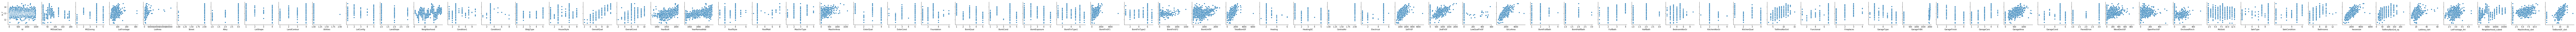

In [21]:
sns.pairplot(x_vars = Xcol, y_vars = 'ln_Y', data = df)

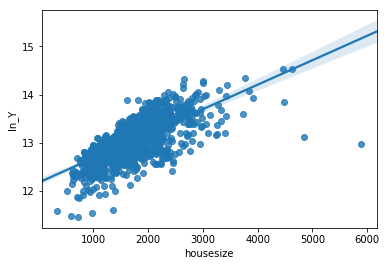

In [33]:
sns.regplot(df['housesize'], df['ln_Y'])

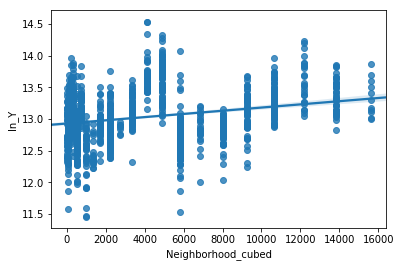

In [32]:
sns.regplot(df['Neighborhood_cubed'], df['ln_Y'])

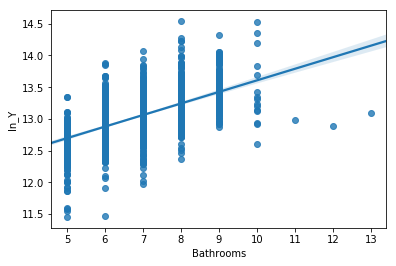

In [31]:
sns.regplot(df['Bathrooms'], df['ln_Y'])

In [0]:
Xfeatures = df[['OverallQual', 'OverallCond', 'HouseStyle', 'GarageArea',
                'Neighborhood_cubed', 'Bathrooms', 'GarageFinish', 
                'TotRmsAbvGrd_sq', 'FullBath',  '2ndFlrSF', '1stFlrSF', 
                'LotFrontage_4rt', 'PavedDrive', 'YearBuilt', 'YearRemodAdd',
                'housesize', 'MSZoning', 'MasVnrArea_cbrt']]

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [34]:
Xfeatures = sm.add_constant(Xfeatures)

model = sm.OLS(Y, Xfeatures).fit()
predictions = model.predict(Xfeatures) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     296.4
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:02:40   Log-Likelihood:                -17414.
No. Observations:                1460   AIC:                         3.487e+04
Df Residuals:                    1441   BIC:                         3.497e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.134e+06   1.41

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [0]:
'''std errors are the second column and p values are the fourth.  Here we can 
see that all but 2 of the values picked can reject the null hypothesis, but they
seem like they would be correlated so ill keep them in for a while and see how
they behave'''

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [0]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [36]:
Xfeatures = sm.add_constant(Xfeatures)

model = sm.OLS(Y, Xfeatures).fit()
predictions = model.predict(Xfeatures) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     296.4
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:03:06   Log-Likelihood:                -17414.
No. Observations:                1460   AIC:                         3.487e+04
Df Residuals:                    1441   BIC:                         3.497e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.134e+06   1.41

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [37]:
Xfeatures = sm.add_constant(Xfeatures)

model = sm.OLS(ln_Y, Xfeatures).fit()
predictions = model.predict(Xfeatures) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     456.0
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:03:26   Log-Likelihood:                 656.79
No. Observations:                1460   AIC:                            -1276.
Df Residuals:                    1441   BIC:                            -1175.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.2277      0

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(Xfeatures.columns, '\n\n')

vif = [variance_inflation_factor(Xfeatures.values, i) for i in range(Xfeatures.shape[1])]
print(vif)

Index(['const', 'OverallQual', 'OverallCond', 'HouseStyle', 'GarageArea', 'Neighborhood_cubed', 'Bathrooms', 'GarageFinish', 'TotRmsAbvGrd_sq', 'FullBath', '2ndFlrSF', '1stFlrSF', 'LotFrontage_4rt', 'PavedDrive', 'YearBuilt', 'YearRemodAdd', 'housesize', 'MSZoning', 'MasVnrArea_cbrt'], dtype='object') 


[21337.33351789901, 2.7865007255718033, 1.4968772576777323, 2.9389080632035767, 2.9217723584476425, 1.1769216653902388, 1.60226048065995, 1.8812252949917216, 3.3493039469230363, 2.2198831989700194, 38.958126337303284, 27.620115063357098, 1.3318929137107682, 1.3388938162279882, 4.165579094641457, 2.148320813639686, 52.71940188695347, 1.2337055847666205, 1.4133851806559585]


In [0]:
Xfeatures2 = Xfeatures.drop(['housesize', '1stFlrSF', '2ndFlrSF', 'FullBath', ], axis = 1)

In [40]:
model = sm.OLS(ln_Y, Xfeatures2).fit()
predictions = model.predict(Xfeatures2) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     497.8
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:05:17   Log-Likelihood:                 554.72
No. Observations:                1460   AIC:                            -1079.
Df Residuals:                    1445   BIC:                            -1000.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1468      0

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [41]:
Xfeatures.corr()

,const,OverallQual,OverallCond,HouseStyle,GarageArea,Neighborhood_cubed,Bathrooms,GarageFinish,TotRmsAbvGrd_sq,FullBath,2ndFlrSF,1stFlrSF,LotFrontage_4rt,PavedDrive,YearBuilt,YearRemodAdd,housesize,MSZoning,MasVnrArea_cbrt
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,1.000000,-0.091932,0.218440,0.562022,0.254222,0.439263,-0.556863,0.408908,0.550600,0.295493,0.476224,0.215661,0.229393,0.572323,0.550684,0.589177,-0.160099,0.431629
OverallCond,NaN,-0.091932,1.000000,-0.031329,-0.151521,-0.067196,-0.153652,0.171245,-0.051453,-0.194149,0.028942,-0.144203,-0.038296,-0.062236,-0.375983,0.073741,-0.074069,0.186951,-0.155128
HouseStyle,NaN,0.218440,-0.031329,1.000000,0.155481,0.040697,0.298891,-0.218062,0.245731,0.237819,0.476543,-0.172351,-0.000975,0.115580,0.270494,0.209973,0.125345,-0.105315,0.187932
GarageArea,NaN,0.562022,-0.151521,0.155481,1.000000,0.225582,0.388354,-0.516428,0.325543,0.405656,0.138347,0.489782,0.324347,0.284885,0.478954,0.371600,0.540413,-0.189250,0.390036
Neighborhood_cubed,NaN,0.254222,-0.067196,0.040697,0.225582,1.000000,0.158617,-0.131045,0.087135,0.172130,0.025544,0.161191,0.032482,0.043823,0.177449,0.175608,0.147419,-0.285973,0.076638
Bathrooms,NaN,0.439263,-0.153652,0.298891,0.388354,0.158617,1.000000,-0.399831,0.328759,0.436416,0.286590,0.318553,0.145660,0.193729,0.453913,0.361788,0.440843,-0.154642,0.291555
GarageFinish,NaN,-0.556863,0.171245,-0.218062,-0.516428,-0.131045,-0.399831,1.000000,-0.220137,-0.407588,-0.141596,-0.334139,-0.222119,-0.289556,-0.595781,-0.444541,-0.355454,0.167695,-0.332599
TotRmsAbvGrd_sq,NaN,0.408908,-0.051453,0.245731,0.325543,0.087135,0.328759,-0.220137,1.000000,0.539031,0.620848,0.401065,0.309803,-0.019548,0.079431,0.180194,0.796900,-0.036756,0.251894
FullBath,NaN,0.550600,-0.194149,0.237819,0.405656,0.172130,0.436416,-0.407588,0.539031,1.000000,0.421378,0.380637,0.170738,0.129435,0.468271,0.439046,0.611555,-0.198290,0.290333


## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
Xfeatures3 = Xfeatures.drop(['housesize', '1stFlrSF', '2ndFlrSF', 'FullBath', 'MasVnrArea_cbrt', 'YearRemodAdd', 'YearBuilt'], axis = 1)

In [44]:
Xfeatures3 = sm.add_constant(Xfeatures3)

model = sm.OLS(ln_Y, Xfeatures3).fit()
predictions = model.predict(Xfeatures3) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     584.7
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:22:31   Log-Likelihood:                 505.30
No. Observations:                1460   AIC:                            -986.6
Df Residuals:                    1448   BIC:                            -923.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.6763      0

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [47]:
Xfeatures3 = sm.add_constant(Xfeatures3)

model = sm.OLS(ln_Y, Xfeatures3).fit(cov_type='HC3')
predictions = model.predict(Xfeatures3) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     348.7
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:24:29   Log-Likelihood:                 505.30
No. Observations:                1460   AIC:                            -986.6
Df Residuals:                    1448   BIC:                            -923.2
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.6763      0

In [0]:
'''increased standard errors very slightly from nonHC3 cov type std'''

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

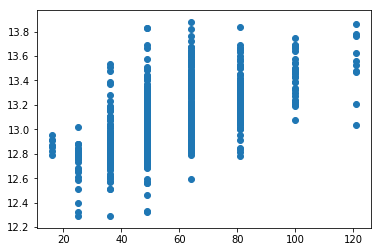

In [53]:
plt.scatter(df['TotRmsAbvGrd_sq'], df['ln_Y'])

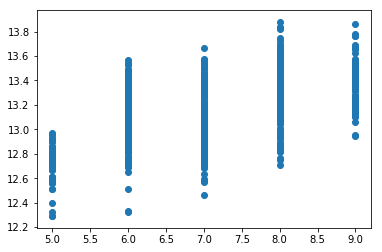

In [54]:
plt.scatter(df['Bathrooms'], df['ln_Y'])

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


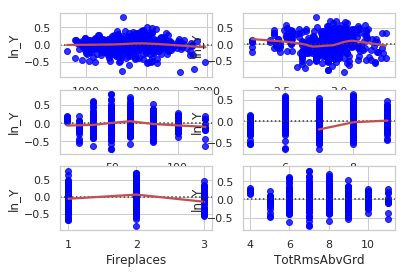

In [64]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=3)
sns.residplot(df['housesize'], df['ln_Y'], lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(df['LotFrontage_4rt'], df['ln_Y'], lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(df['TotRmsAbvGrd_sq'], df['ln_Y'], lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(df['Bathrooms'], df['ln_Y'], lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})
sns.residplot(df['Fireplaces'], df['ln_Y'], lowess=True, color="r", ax=axs[2][0], scatter_kws={'color':'blue'})
sns.residplot(df['TotRmsAbvGrd'], df['ln_Y'], lowess=True, color="r", ax=axs[2][1], scatter_kws={'color':'blue'})

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
'''oh, id actually been doing this all along.  And yes, with a bit of work I got a better result out of stretching
and squishing the variables to make analysis easier.  I can also see how people
worry about data scientists massaging data, as there are so many analysis techs
with engineered variables it can start to get pretty convoluted, if you have some sort of agenda anyway.'''

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other Diagnostic tests. Can you show that residuals are normally distributed graphically?
- Study for the sprint challenge!
- Write a blog post about iferential modeling using linear regression.